In [2]:
import pandas as pd
import unicodedata
import os
import numpy as np
import json

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, ScalarFormatter
import seaborn as sns

# Đánh giá về tìm kiếm ngôi nhà

### Case E
**Complex**  
X1: Khách hàng 30 tuổi, có gia đình, có 2 con, nhóm 2.  
Có sẵn 3 tỷ VND, mỗi tháng chi trả được 30 triệu.  
Cần tìm nhà Q10

In [3]:
output= pd.read_excel('testOutput\\cust_x1.xlsx')
print(len(output))
evaluationDf= output[output['housePerformance'] >= 70].sort_values(by='housePerformance', ascending=False)
print(len(output))
print('Số lượng >= 70%: ', len(evaluationDf))
print(evaluationDf.iloc[0]['housePerformance'])
print(evaluationDf.iloc[-1]['housePerformance'])
print(evaluationDf.keys())
print(evaluationDf["legal_status"].unique())

1259
1259
Số lượng >= 70%:  51
88.85
71.54
Index(['Unnamed: 0', 'executedRuleGroup', 'houseInfo', 'maxScore',
       'houseScore', 'housePerformance', 'buyerInfo', 'id', 'group', 'age',
       'is_married', 'no_child', 'month_income', 'monthly_amt', 'avai_amt',
       'desired_location', 'desired_interiorStatus', 'meta_url', 'meta_code',
       'address_street', 'address_ward', 'address_district', 'address_city',
       'price', 'area', 'area_site', 'area_basebuilt', 'area_netused',
       'area_yard', 'area_length', 'area_width', 'area_front', 'house_noFloor',
       'house_type', 'house_noBasement', 'house_direction', 'in_room_noBed',
       'in_room_noBath', 'in_room_noKitchen', 'in_room_noRelax',
       'in_room_others', 'in_interiorStatus', 'prj_name', 'prj_investor',
       'prj_status', 'prj_tower', 'legal_status', 'other_overview',
       'other_good_outstandingCharacteristics', 'other_good_locationDesc',
       'other_good_community', 'other_good_education', 'overall_info'],
 

In [4]:
for i in range(len(evaluationDf)):
    print('Record no ', i+1,'. House performance: ', evaluationDf.iloc[i]['housePerformance'])
    print('Quan huyen: ', evaluationDf.iloc[i][ 'address_district'],
         ' . So phong ngu: ', evaluationDf.iloc[i][ 'in_room_noBed'],
         ' . Gia ban: ', evaluationDf.iloc[i][ 'price'],
         ' . Tinh trang phap ly: ', evaluationDf.iloc[i][ 'legal_status'],
         )

Record no  1 . House performance:  88.85
Quan huyen:  Thủ Đức  . So phong ngu:  2  . Gia ban:  2350000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  2 . House performance:  85.0
Quan huyen:  Bình Thạnh  . So phong ngu:  1  . Gia ban:  2200000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  3 . House performance:  85.0
Quan huyen:  Bình Thạnh  . So phong ngu:  2  . Gia ban:  2200000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  4 . House performance:  81.15
Quan huyen:  Thủ Đức  . So phong ngu:  2  . Gia ban:  2730000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  5 . House performance:  81.15
Quan huyen:  Thủ Đức  . So phong ngu:  2  . Gia ban:  2700000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  6 . House performance:  77.31
Quan huyen:  Bình Thạnh  . So phong ngu:  2  . Gia ban:  2600000000.0  . Tinh trang phap ly:  Sổ hồng
Record no  7 . House performance:  77.31
Quan huyen:  Bình Chánh  . So phong ngu:  2  . Gia ban:  2000000000.0  . Tinh trang phap ly:  Sổ hồng
Record no 

address_district
Quận 2        24
Bình Thạnh    14
Thủ Đức        4
Quận 9         2
Gò Vấp         2
Quận 4         2
Quận 3         2
Bình Chánh     1
Name: count, dtype: int64
   housePerformance  unique_address_count  \
6             88.85                     1   
5             85.00                     1   
4             81.15                     1   
3             77.31                     7   
2             73.46                     3   
1             72.31                     1   
0             71.54                     1   

                                 unique_address_list  
6                                          [Thủ Đức]  
5                                       [Bình Thạnh]  
4                                          [Thủ Đức]  
3  [Bình Thạnh, Bình Chánh, Quận 9, Quận 2, Thủ Đ...  
2                       [Quận 2, Bình Thạnh, Gò Vấp]  
1                                           [Quận 2]  
0                                           [Quận 3]  


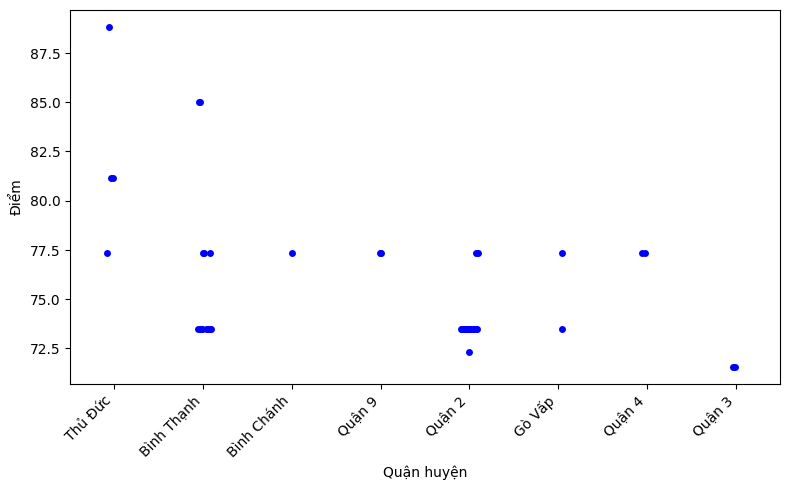

In [5]:
# result = evaluationDf.groupby('housePerformance')['address_district'].agg(list).reset_index()
# print(result)
result = evaluationDf.groupby('housePerformance')['address_district'].agg(['nunique', 'unique']).reset_index().sort_values(by='housePerformance', ascending=False)
result.columns = ['housePerformance', 'unique_address_count', 'unique_address_list']
# print(evaluationDf.groupby('address_district').agg(['count']))
print(evaluationDf['address_district'].value_counts())
print(result)
# print(result.iloc[2]['unique_address_list'])

# Create a box plot
plt.figure(figsize=(8, 5))
sns.stripplot(x='address_district', y='housePerformance', data=evaluationDf, jitter=True, color='blue', marker='o')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment as needed
plt.tight_layout()
plt.xlabel('Quận huyện')
plt.ylabel('Điểm')
plt.savefig('testOutput/chart/testcase_x1_quanhuyen.png')
plt.show()


   housePerformance  unique_bedroom_count unique_bedroom_list
6             88.85                     1                 [2]
5             85.00                     2              [1, 2]
4             81.15                     1                 [2]
3             77.31                     2              [2, 1]
2             73.46                     2              [1, 2]
1             72.31                     1                 [3]
0             71.54                     2              [2, 1]
in_room_noBed
2    29
1    21
3     1
Name: count, dtype: int64


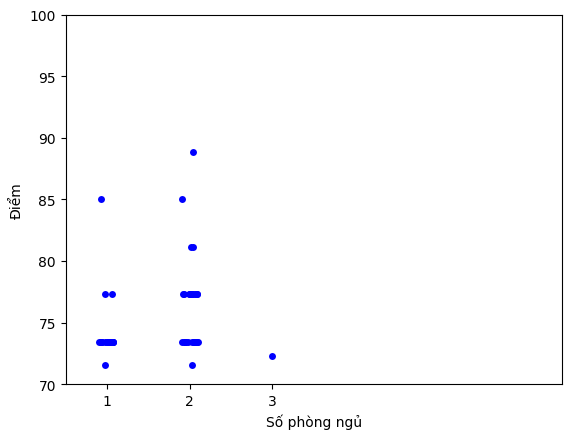

In [6]:
result = evaluationDf.groupby('housePerformance')['in_room_noBed'].agg(['nunique', 'unique']).reset_index().sort_values(by='housePerformance', ascending=False)
result.columns = ['housePerformance', 'unique_bedroom_count', 'unique_bedroom_list']
print(result)

print(evaluationDf['in_room_noBed'].value_counts())

### Chart
plt.figsize=(2, 1)

stripplot= sns.stripplot(x='in_room_noBed', y='housePerformance', data=evaluationDf, jitter=True, color='blue', marker='o')
# Set labels and title
plt.xlabel('Số phòng ngủ')
plt.ylabel('Điểm')
plt.ylim(70, 100)
stripplot.axes.set_xlim(-0.5, len(evaluationDf['address_district'].unique()) - 2.5)
plt.savefig('testOutput/chart/testcase_x1_phongngu.png')

# Show the plot
plt.show()

Min  1800000000.0
Max  4000000000.0
   housePerformance  unique_price_count  \
6             88.85                   1   
5             85.00                   1   
4             81.15                   2   
3             77.31                   9   
2             73.46                  15   
1             72.31                   1   
0             71.54                   2   

                                   unique_price_list  
6                                     [2350000000.0]  
5                                     [2200000000.0]  
4                       [2730000000.0, 2700000000.0]  
3  [2600000000.0, 2000000000.0, 1990000000.0, 186...  
2  [3200000000.0, 3800000000.0, 3900000000.0, 376...  
1                                     [3570000000.0]  
0                       [2750000000.0, 2520000000.0]  


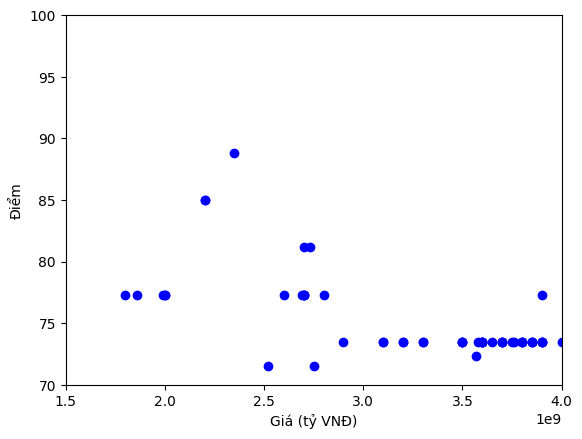

In [7]:
result = evaluationDf.groupby('housePerformance')['price'].agg(['nunique', 'unique']).reset_index().sort_values(by='housePerformance', ascending=False)
result.columns = ['housePerformance', 'unique_price_count', 'unique_price_list']
print('Min ', evaluationDf['price'].min())
print('Max ', evaluationDf['price'].max())

print(result)

# Create a scatter plot
plt.scatter(evaluationDf['price'], evaluationDf['housePerformance'], marker='o', color='blue')

# Set labels and title
plt.xlabel('Giá (tỷ VNĐ)')
plt.ylabel('Điểm')
# plt.title('Scatter Plot of House Performance vs. Price')

plt.xlim(1.5*10**9, 4*10**9)
plt.ylim(70, 100)

plt.savefig('testOutput/chart/testcase_x1_gia.png')

# Show the plot
plt.show()

In [8]:
print(evaluationDf['address_district'].unique())
print(evaluationDf['housePerformance'].unique())

['Thủ Đức' 'Bình Thạnh' 'Bình Chánh' 'Quận 9' 'Quận 2' 'Gò Vấp' 'Quận 4'
 'Quận 3']
[88.85 85.   81.15 77.31 73.46 72.31 71.54]


### Case D
**Luật về giấy tờ**  
A1: Khách hàng nhóm 4

In [31]:
output= pd.read_excel('testOutput\\cust_d1.xlsx')
evaluationDf= output
print(evaluationDf.keys())

Index(['Unnamed: 0', 'executedRuleGroup', 'houseInfo', 'maxScore',
       'houseScore', 'housePerformance', 'buyerInfo', 'id', 'group', 'age',
       'is_married', 'no_child', 'month_income', 'monthly_amt', 'avai_amt',
       'desired_location', 'desired_interiorStatus', 'meta_url', 'meta_code',
       'address_street', 'address_ward', 'address_district', 'address_city',
       'price', 'area', 'area_site', 'area_basebuilt', 'area_netused',
       'area_yard', 'area_length', 'area_width', 'area_front', 'house_noFloor',
       'house_type', 'house_noBasement', 'house_direction', 'in_room_noBed',
       'in_room_noBath', 'in_room_noKitchen', 'in_room_noRelax',
       'in_room_others', 'in_interiorStatus', 'prj_name', 'prj_investor',
       'prj_status', 'prj_tower', 'legal_status', 'other_overview',
       'other_good_outstandingCharacteristics', 'other_good_locationDesc',
       'other_good_community', 'other_good_education', 'overall_info'],
      dtype='object')


In [32]:
evaluationDf=evaluationDf.groupby(['housePerformance', 'legal_status']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
print(evaluationDf)

   housePerformance legal_status  count
2               100      Sổ hồng    622
3               100        Sổ đỏ     49
0                20     Giấy tay      1
1                20   HĐ mua bán    566


### Case A
**Luật về số phòng ngủ**  
A1: Khách hàng 30 tuổi, chưa có gia đình và không có con

In [33]:
output_a1= pd.read_excel('testOutput\\cust_a1.xlsx')
evaluationDf_a1= output_a1
evaluationDf_a1=evaluationDf_a1.groupby(['housePerformance', 'in_room_noBed']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
print(len(evaluationDf_a1))
print(evaluationDf_a1.head(12))
print(len(output_a1))

17
    housePerformance  in_room_noBed  count
16             91.82              2    321
15             91.82              1     67
14             89.09              4     44
13             89.09              3    207
9              72.73              9      1
12             72.73             25      1
11             72.73             12      1
10             72.73             10      2
8              72.73              8      3
7              72.73              7      1
6              72.73              6      9
5              72.73              5     14
1259


A2: Khách hàng nhóm 2, 30 tuổi, có 2 con

In [34]:
output_a2= pd.read_excel('testOutput\\cust_a2.xlsx')
evaluationDf_a2= output_a2
evaluationDf_a2=evaluationDf_a2.groupby(['housePerformance', 'in_room_noBed']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
print(len(evaluationDf_a2))
evaluationDf_a2.head(12)

17


,housePerformance,in_room_noBed,count
16,100.00,5,14
15,100.00,4,44
14,100.00,3,207
13,86.36,2,321
9,72.73,9,1
12,72.73,25,1
11,72.73,12,1
10,72.73,10,2
8,72.73,8,3
7,72.73,7,1


A3: Khách hàng nhóm 4

In [35]:
output_a3= pd.read_excel('testOutput\\cust_a3.xlsx')
evaluationDf_a3= output_a3
evaluationDf_a3=evaluationDf_a3.groupby(['housePerformance', 'in_room_noBed']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
print(len(evaluationDf_a3))
evaluationDf_a3.head(12)

17


,housePerformance,in_room_noBed,count
16,100.00,4,44
15,100.00,3,207
14,100.00,2,321
13,91.82,1,67
9,72.73,9,1
12,72.73,25,1
11,72.73,12,1
10,72.73,10,2
8,72.73,8,3
7,72.73,7,1


### Case B
**Luật về Tài chính**  
B1: Khách hàng cần tìm BĐS có với tài sản có sẵn là 1.5 tỷ và có thể chi trả hằng tháng 40.0 triệu

In [36]:
output_b1= pd.read_excel('testOutput\\cust_b1.xlsx')
evaluationDf_b1= output_b1
# evaluationDf_b1.columns
evaluationDf_b1= evaluationDf_b1.groupby(['housePerformance', 'price']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
evaluationDf_b1.head(50)
evaluationDf_b1['price_mln']= evaluationDf_b1['price']/ 1000000

In [40]:
pd.set_option('display.max_colwidth', None)
result = evaluationDf_b1.groupby('housePerformance')['price'].agg(list).reset_index()
result['price'] = result['price'].apply(sorted, reverse=True)
result=result.sort_values(by='housePerformance', ascending=False)
# result.reset_option('display.max_colwidth')
print(result)

   housePerformance  \
9            100.00   
8             88.89   
7             77.78   
6             73.33   
5             72.22   
4             62.22   
3             51.11   
2             45.56   
1             44.44   
0             17.78   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [41]:
print(result.loc[0]['price'])

[80000000000.0, 60000000000.0, 58000000000.0, 56000000000.0, 53000000000.0, 52000000000.0, 50000000000.0, 42500000000.0, 39000000000.0, 38000000000.0, 37620000000.0, 37010000000.0, 36500000000.0, 36000000000.0, 35000000000.0, 32500000000.0, 31000000000.0, 30000000000.0, 29000000000.0, 28000000000.0, 27000000000.0, 24000000000.0, 23000000000.0, 22700000000.0, 22000000000.0, 21000000000.0, 20990000000.0, 20600000000.0, 20000000000.0, 19900000000.0, 19800000000.0, 19700000000.0, 19000000000.0, 18900000000.0, 18700000000.0, 18500000000.0, 18100000000.0, 18000000000.0, 17500000000.0, 17000000000.0, 16900000000.0, 16850000000.0, 16500000000.0, 16200000000.0, 16000000000.0, 15500000000.0, 15450000000.0, 15000000000.0, 14500000000.0, 14400000000.0, 14300000000.0, 14200000000.0, 14000000000.0, 13600000000.0, 13530000000.0, 13500000000.0, 13400000000.0, 13000000000.0, 12880000000.0, 12600000000.0, 12500000000.0, 12300000000.0, 12000000000.0, 11600000000.0, 11000000000.0, 10800000000.0, 105000000

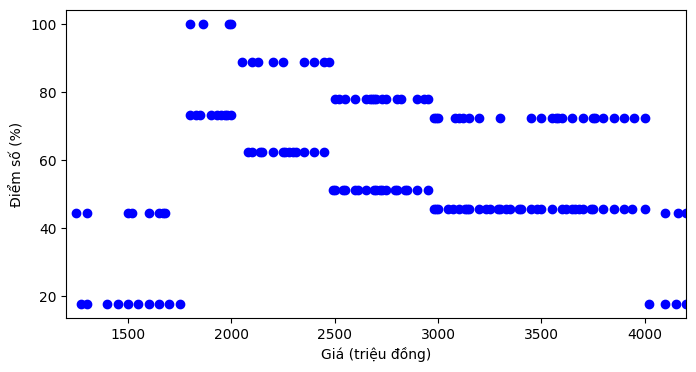

In [42]:
# # Scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(evaluationDf_b1['price_mln'], evaluationDf_b1['housePerformance'], marker='o', color='blue', )
plt.xlabel('Giá (triệu đồng)')
plt.ylabel('Điểm số (%)')

plt.xlim(1200, 4200)
plt.savefig('testOutput/chart/testcase_b1.png')
plt.show()

B2: Khách hàng cần tìm BĐS có với tài sản có sẵn là 4 tỷ và có thể chi trả hằng tháng 50.0 triệu

In [43]:
output_b2= pd.read_excel('testOutput\\cust_b2.xlsx')
evaluationDf_b2= output_b2
print(len(output_b2))
# evaluationDf_b1.columns
evaluationDf_b2= evaluationDf_b2.groupby(['housePerformance', 'price']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])
evaluationDf_b2.head(50)
evaluationDf_b2['price_mln']= evaluationDf_b2['price']/ 1000000
print(len(evaluationDf_b2))
print(evaluationDf_b2.head(15))
print(evaluationDf_b2['price_mln'].min())
print(evaluationDf_b2['price_mln'].max())

1259
458
     housePerformance         price  count  price_mln
457            100.00  4.000000e+09      2     4000.0
456            100.00  3.950000e+09      2     3950.0
455            100.00  3.900000e+09      5     3900.0
454            100.00  3.850000e+09      3     3850.0
453            100.00  3.800000e+09      5     3800.0
452            100.00  3.760000e+09      1     3760.0
451            100.00  3.750000e+09      1     3750.0
450            100.00  3.700000e+09      5     3700.0
449            100.00  3.650000e+09      1     3650.0
448            100.00  3.600000e+09      6     3600.0
442             88.89  4.350000e+09      4     4350.0
437             88.89  4.100000e+09      2     4100.0
438             88.89  4.160000e+09      1     4160.0
439             88.89  4.200000e+09      5     4200.0
440             88.89  4.250000e+09      2     4250.0
1150.0
155000.0


In [44]:
pd.set_option('display.max_colwidth', None)
result = evaluationDf_b2.groupby('housePerformance')['price'].agg(list).reset_index()
result['price'] = result['price'].apply(sorted, reverse=True)
result=result.sort_values(by='housePerformance', ascending=False)
# result.reset_option('display.max_colwidth')
print(result)

   housePerformance  \
9            100.00   
8             88.89   
7             77.78   
6             73.33   
5             72.22   
4             62.22   
3             51.11   
2             45.56   
1             44.44   
0             17.78   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

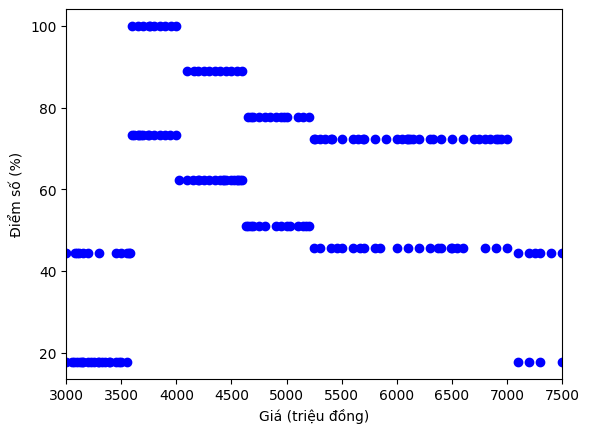

In [45]:
# # Scatter plot
plt.scatter(evaluationDf_b2['price_mln'], evaluationDf_b2['housePerformance'], marker='o', color='blue')
# plt.bar(evaluationDf_b1['price_mln'], evaluationDf_b1['housePerformance'],  color='blue')
plt.xlabel('Giá (triệu đồng)')
plt.ylabel('Điểm số (%)')


plt.xlim(3000, 7500)
plt.savefig('testOutput/chart/testcase_b2.png')
plt.show()

### Case C
**Luật về vị trí của bất động sản**  
C1: Khách hàng cần tìm BĐS có vị trí là quận 7

In [46]:
# output_c1= pd.read_excel('testOutput\\cust_c1.xlsx')
# evaluationDf_c1= output_c1
# evaluationDf_c1.groupby(['desired_location', 'address_district', 'housePerformance']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])

*Case C2*  
Khách hàng cần tìm BĐS có vị trí là quận 3

In [47]:
# outputDf_c2= pd.read_excel('testOutput\\cust_c2.xlsx')
# evaluationDf_c2= outputDf_c2
# outputDf_c2.groupby(['desired_location', 'address_district', 'housePerformance']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])

*Case C3*  
Khách hàng cần tìm BĐS có vị trí là Tân Bình

In [48]:
# outputDf_c3= pd.read_excel('testOutput\\cust_c3.xlsx')
# evaluationDf_c3= outputDf_c3
# outputDf_c3.groupby(['desired_location', 'address_district', 'housePerformance']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])

# Legal estimation

*Case D1*  
Đánh giá về tình trạng giấy tờ pháp lý

In [49]:
outputDf_d1= pd.read_excel('testOutput\\cust_d1.xlsx')
evaluationDf_d1= outputDf_d1
# outputDf_d1.columns
outputDf_d1.groupby(['legal_status', 'housePerformance']).size().reset_index(name='count').sort_values(by=['housePerformance'], ascending=[False])

,legal_status,housePerformance,count
2,Sổ hồng,100,622
3,Sổ đỏ,100,49
0,Giấy tay,20,1
1,HĐ mua bán,20,566
